In [1]:
  !pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
dfAverage = pd.read_excel('S -달서구 정규화v3.xlsx')
dfAverage.drop(columns='행정구역', inplace=True)
dfAverage.head()


,병원 수,약국 수,경로당 수,체육시설 수,공원 수,버스정류장 수,지하철 역 수,음식점 수
0,0.694870,0.000000,-0.772285,-0.238791,-0.996746,-1.189408,0.968246,0.116607
1,-0.502810,-0.538330,-0.367240,-1.091614,1.194377,-0.505235,-0.968246,-1.109218
2,0.435912,0.645996,-0.772285,-0.579920,-0.867856,-0.399978,0.968246,0.499374
3,-1.441531,-1.291992,-1.096321,-0.921049,-1.125636,-1.189408,-0.968246,-1.404772
4,-1.117834,-1.184326,-0.691276,-0.409355,-0.867856,-0.715750,-0.968246,-0.857270


**KMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

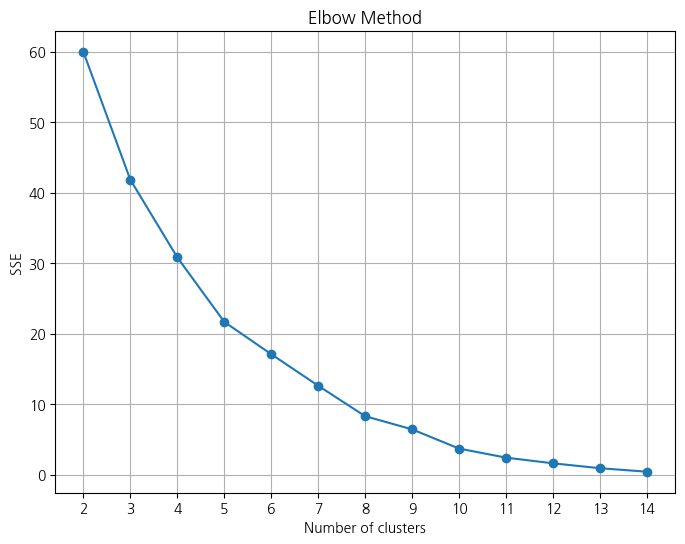

In [5]:
sse = []

K_range = range(2, len(dfAverage))

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfAverage)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(K_range)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

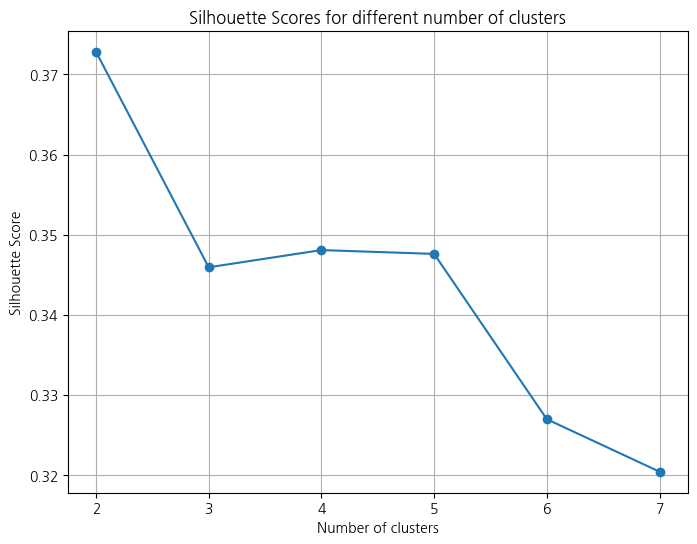

In [6]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# 클러스터 범위 설정
K_range = range(2, 8)  # 2에서 8 클러스터 시도

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dfAverage)
    score = silhouette_score(dfAverage, cluster_labels)
    silhouette_scores.append(score)

# Silhouette Score Plot 생성
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


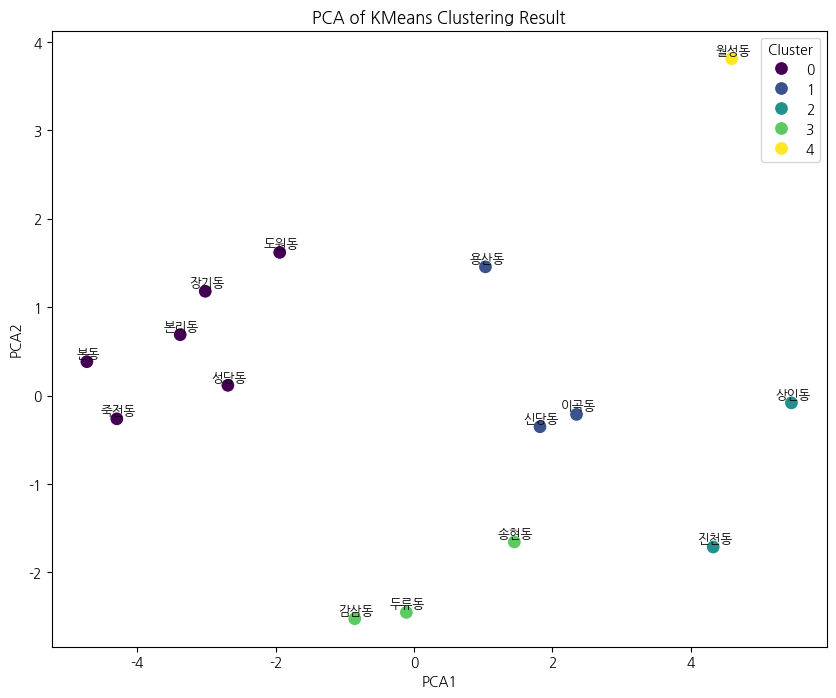

Cluster 0:
[1, 3, 4, 6, 12, 13]
Cluster 1:
[8, 9, 11]
Cluster 2:
[5, 14]
Cluster 3:
[0, 2, 7]


In [8]:
# KMeans 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dfAverage.drop('cluster', axis=1))
dfAverage['PCA1'] = pca_result[:, 0]
dfAverage['PCA2'] = pca_result[:, 1]

# 2D 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=dfAverage, palette='viridis', s=100)
행정구역 = ['감삼동', '도원동', '두류동', '본동', '본리동', '상인동', '성당동', '송현동','신당동','용산동','월성동','이곡동','장기동','죽전동','진천동']

for i, txt in enumerate(행정구역):
    plt.text(dfAverage['PCA1'][i] + 0.02, dfAverage['PCA2'][i] + 0.02, txt, fontsize=9, ha='center', va='bottom')

plt.title('PCA of KMeans Clustering Result')
plt.legend(title='Cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())

In [9]:
dfAverage.to_excel('S - 달서구 KMeans클러스터링 결과.xlsx', index=False)

**DBSCAN**

In [10]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(dfAverage)
dfAverage['cluster'] = db.labels_
print(dfAverage)

        병원 수      약국 수     경로당 수    체육시설 수      공원 수   버스정류장 수   지하철 역 수  \
0   0.694870  0.000000 -0.772285 -0.238791 -0.996746 -1.189408  0.968246   
1  -0.502810 -0.538330 -0.367240 -1.091614  1.194377 -0.505235 -0.968246   
2   0.435912  0.645996 -0.772285 -0.579920 -0.867856 -0.399978  0.968246   
3  -1.441531 -1.291992 -1.096321 -0.921049 -1.125636 -1.189408 -0.968246   
4  -1.117834 -1.184326 -0.691276 -0.409355 -0.867856 -0.715750 -0.968246   
5   2.378095  1.614990  1.820000  0.784598  1.452156  0.705224  0.000000   
6  -0.567549 -0.645996 -0.529258 -0.579920 -1.125636 -0.557864 -0.968246   
7   0.694870  0.861328 -0.043205  0.272904 -0.481188  0.126309  0.968246   
8  -0.988355  0.107666 -0.205223  0.784598  0.163260  1.126253  0.968246   
9  -0.179112 -0.861328  1.090920  0.784598  0.936598  0.336823  0.000000   
10  0.694870  1.507324  0.604867  2.660809  1.709935  2.389341 -0.968246   
11  0.759609  0.645996  0.280831  0.784598  0.936598  0.284195  0.968246   
12 -1.085464

**계층적 군집화**

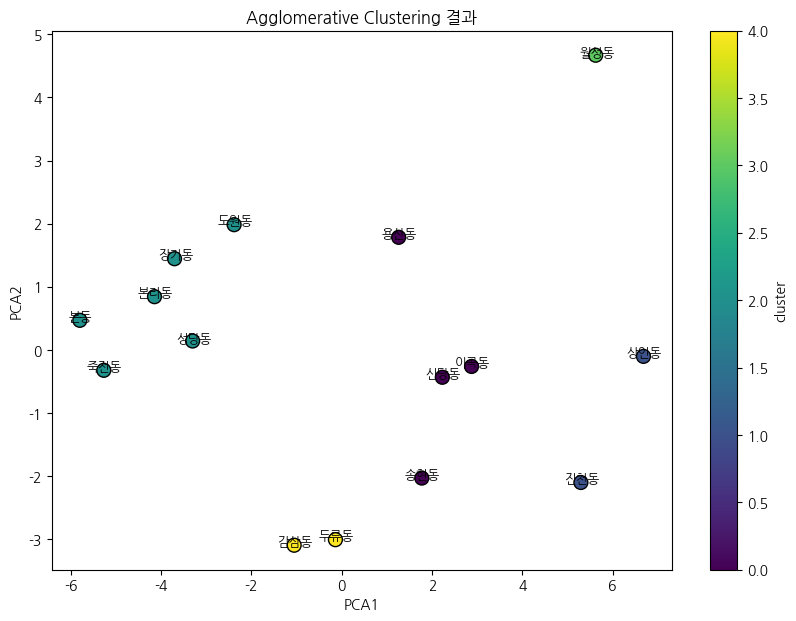

Cluster 0:
[7, 8, 9, 11]
Cluster 1:
[5, 14]
Cluster 2:
[1, 3, 4, 6, 12, 13]
Cluster 3:
[10]


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5, linkage='complete')
clusters = agg.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfAverage.drop('cluster', axis=1))
dfAverage['PCA1'] = principal_components[:, 0]
dfAverage['PCA2'] = principal_components[:, 1]

# 2D 시각화
plt.figure(figsize=(10, 7))
plt.scatter(dfAverage['PCA1'], dfAverage['PCA2'], c=dfAverage['cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)

# 각 포인트에 행정구역 이름 레이블 추가
for i, txt in enumerate(행정구역):
    plt.text(dfAverage['PCA1'][i] + 0.02, dfAverage['PCA2'][i], txt, fontsize=9, ha='center')

plt.title('Agglomerative Clustering 결과')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())

In [12]:
dfAverage.to_excel('S -달서구 계층적 군집화 결과.xlsx', index=False)

**K**-**Medoids**

In [13]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.3 MB/s eta 0:00:00


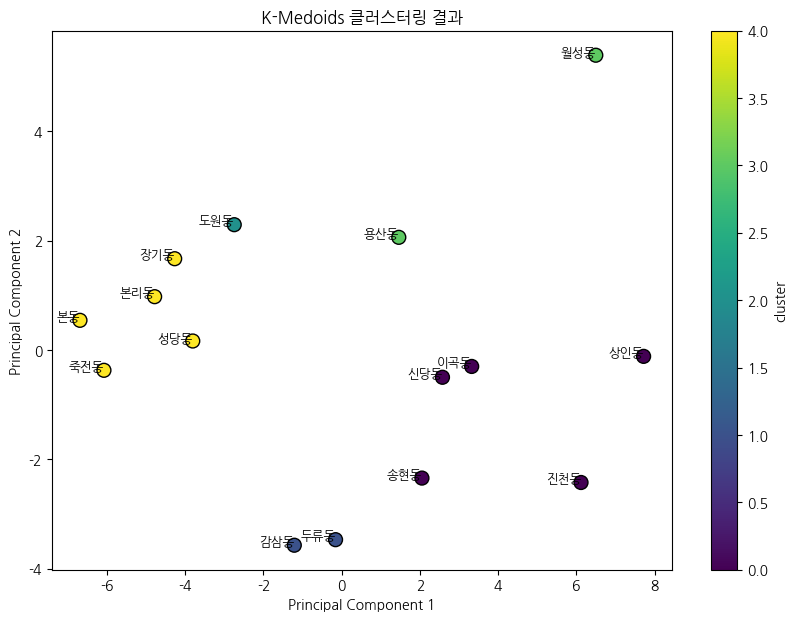

Cluster 0:
[5, 7, 8, 11, 14]
Cluster 1:
[0, 2]
Cluster 2:
[1]
Cluster 3:
[9, 10]


In [14]:
from sklearn_extra.cluster import KMedoids

# KMedoids 클러스터링
kmedoids = KMedoids(n_clusters=5, random_state=42)
clusters = kmedoids.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfAverage.drop('cluster', axis=1))

# 2D 시각화
plt.figure(figsize=(10, 7))
sc = plt.scatter(principal_components[:, 0], principal_components[:, 1],
                 c=dfAverage['cluster'], cmap='viridis', marker='o', s=100, edgecolor='k')

# 각 포인트에 행정구역 이름 레이블 추가
for i, txt in enumerate(행정구역):
    plt.text(principal_components[i, 0], principal_components[i, 1], txt, fontsize=9, ha='right')

plt.title('K-Medoids 클러스터링 결과')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(sc, label='cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())


In [15]:
dfAverage.to_excel('S -달서구 K-Medoids클러스터링 결과.xlsx', index=False)